In [1]:
%tensorflow_version 2.x

UsageError: Line magic function `%tensorflow_version` not found.


# 資料預處理

In [2]:
import tensorflow as tf
tf.__version__

'2.14.0'

In [3]:
import tensorflow.keras.utils as np_utils
import numpy as np
import random

random.seed(666)

In [4]:
# from tensorflow.keras.datasets import mnist 
# (x_train_image,y_train_label),\
# (x_test_image,y_test_label)= mnist.load_data()

In [5]:
import cv2
import numpy as np

# 讀取圖片
images = []
for i in range(1001):
    image_path = f'data/{i}.jpg'
    image = cv2.imread(image_path, 0)
    images.append(image)

# 讀取標籤
labels = []
with open('label_train.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        label = line.strip()
        labels.append(label)

# 轉換成 NumPy 陣列
x_train_image = np.array(images)
y_train_label = np.array(labels)

# 檢查形狀
print("x_train_image shape:", x_train_image.shape)
print("y_train_label shape:", y_train_label.shape)

x_train_image shape: (1001, 50, 140)
y_train_label shape: (1001,)


In [6]:
import cv2
import numpy as np

# 讀取圖片
images = []
for i in range(1001, 1102):
    image_path = f'data/{i}.jpg'
    image = cv2.imread(image_path, 0)
    images.append(image)

# 讀取標籤
labels = []
with open('label_test.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        label = line.strip()
        labels.append(label)

# 轉換成 NumPy 陣列
x_test_image = np.array(images)
y_test_label = np.array(labels)

# 檢查形狀
print("x_test_image shape:", x_test_image.shape)
print("y_test_label shape:", y_test_label.shape)

x_test_image shape: (101, 50, 140)
y_test_label shape: (101,)


In [7]:
encoding_dict = {
    '0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9,
    'A': 10, 'B': 11, 'C': 12, 'D': 13, 'E': 14, 'F': 15, 'G': 16, 'H': 17, 'I': 18,
    'J': 19, 'K': 20, 'L': 21, 'M': 22, 'N': 23, 'O': 24, 'P': 25, 'Q': 26, 'R': 27,
    'S': 28, 'T': 29, 'U': 30, 'V': 31, 'W': 32, 'X': 33, 'Y': 34, 'Z': 35
}

decoding_dict = {
    0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9',
    10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I',
    19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R',
    28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z'
}


In [8]:
y_train_label

array(['NH93', 'DT6V', 'RZ5H', ..., 'CZDV', 'DVVP', 'N94D'], dtype='<U4')

In [9]:
import numpy as np

# 將每個字符轉換為對應的編碼形式
y_train_encoded = [[encoding_dict[char] for char in label] for label in y_train_label]

# 印出轉換後的結果
print(y_train_encoded)

# 將編碼轉換為原始類別標籤
y_train_decoded = []
for label in y_train_encoded:
    decoded_label = ''.join([decoding_dict[code] for code in label])
    y_train_decoded.append(decoded_label)

# 印出轉換後的結果
print(y_train_decoded)

[[23, 17, 9, 3], [13, 29, 6, 31], [27, 35, 5, 17], [7, 2, 34, 6], [32, 22, 13, 12], [31, 34, 2, 13], [5, 27, 15, 23], [2, 32, 32, 9], [5, 16, 35, 29], [25, 20, 3, 12], [32, 22, 13, 23], [15, 3, 7, 16], [20, 31, 22, 31], [4, 3, 34, 20], [5, 5, 23, 6], [9, 4, 3, 22], [32, 27, 5, 5], [32, 4, 17, 31], [35, 2, 34, 2], [16, 31, 29, 22], [7, 12, 34, 20], [32, 20, 5, 35], [32, 22, 13, 12], [34, 15, 2, 7], [12, 13, 15, 32], [34, 6, 25, 3], [35, 29, 32, 4], [16, 29, 16, 4], [13, 20, 2, 17], [3, 7, 9, 3], [31, 22, 13, 16], [35, 27, 5, 16], [16, 32, 32, 32], [15, 23, 6, 31], [9, 32, 22, 27], [2, 29, 27, 3], [27, 7, 23, 20], [12, 32, 12, 16], [16, 9, 4, 12], [34, 4, 4, 31], [22, 16, 22, 12], [6, 23, 15, 12], [17, 2, 13, 20], [27, 20, 27, 31], [4, 20, 17, 22], [32, 6, 27, 25], [7, 9, 22, 17], [25, 23, 12, 23], [9, 7, 5, 22], [15, 15, 12, 4], [35, 22, 32, 31], [7, 34, 29, 9], [15, 3, 7, 16], [16, 15, 27, 12], [20, 27, 35, 34], [16, 23, 20, 20], [12, 27, 4, 12], [23, 6, 22, 6], [15, 31, 22, 16], [9, 5

In [10]:
# 將每個字符轉換為對應的編碼形式
y_test_encoded = [[encoding_dict[char] for char in label] for label in y_test_label]

# 印出轉換後的結果
print(y_test_encoded)

# 將編碼轉換為原始類別標籤
y_test_decoded = []
for label in y_test_encoded:
    decoded_label = ''.join([decoding_dict[code] for code in label])
    y_test_decoded.append(decoded_label)

# 印出轉換後的結果
print(y_test_decoded)

[[7, 15, 34, 3], [29, 20, 25, 2], [27, 5, 4, 27], [27, 3, 32, 4], [7, 16, 22, 35], [16, 12, 12, 35], [32, 7, 7, 29], [13, 20, 35, 29], [5, 22, 7, 6], [23, 35, 29, 35], [20, 23, 29, 16], [5, 31, 27, 20], [25, 27, 13, 25], [34, 6, 3, 15], [16, 27, 31, 2], [16, 29, 32, 3], [3, 31, 31, 3], [17, 20, 27, 7], [12, 35, 13, 31], [16, 23, 20, 20], [9, 6, 23, 13], [2, 22, 35, 31], [20, 7, 23, 22], [34, 32, 34, 25], [6, 13, 25, 29], [15, 15, 12, 4], [17, 3, 12, 25], [5, 17, 22, 9], [29, 9, 31, 17], [13, 6, 31, 15], [12, 15, 4, 22], [2, 25, 32, 17], [5, 2, 17, 27], [7, 2, 4, 3], [31, 15, 17, 4], [12, 35, 7, 13], [5, 9, 25, 12], [4, 25, 29, 5], [9, 25, 16, 7], [3, 29, 4, 2], [6, 35, 17, 20], [29, 12, 2, 16], [29, 23, 35, 9], [16, 20, 34, 5], [15, 29, 20, 16], [13, 12, 23, 3], [9, 25, 31, 3], [3, 31, 31, 3], [32, 29, 31, 27], [27, 7, 23, 20], [5, 32, 7, 7], [9, 32, 22, 27], [25, 9, 2, 32], [23, 6, 29, 16], [17, 35, 31, 35], [3, 23, 34, 16], [23, 16, 22, 34], [17, 9, 23, 12], [16, 35, 34, 6], [12, 34,

In [11]:
x_train=x_train_image.astype('float32') #.reshape(-1,7000).astype('float32')
x_test=x_test_image.astype('float32') #.reshape(-1,7000).astype('float32')

In [12]:
x_train_normalize = x_train / 255
x_test_normalize = x_test / 255

In [13]:
# y_train_onehot = np_utils.to_categorical(y_train_label)
# y_test_onehot = np_utils.to_categorical(y_test_label)
import numpy as np


num_classes = np.max(y_train_encoded) + 1
print(num_classes)
# 進行 one-hot 編碼
y_train_onehot = np.eye(num_classes)[y_train_encoded]
print(y_train_onehot[0])

# 進行 one-hot 編碼
y_test_onehot = np.eye(num_classes)[y_test_encoded]
print(y_test_onehot[0])


36
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [14]:
print('Train feature:',x_train_normalize.shape)
print('Train label:',y_train_onehot.shape)

Train feature: (1001, 50, 140)
Train label: (1001, 4, 36)


In [15]:
print('Test feature:',x_test_normalize.shape)
print('Test label:',y_test_onehot.shape)

Test feature: (101, 50, 140)
Test label: (101, 4, 36)


# 建立模型

In [16]:
from tensorflow.keras.layers import Dense 
from tensorflow.keras.layers import Reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
import random

random.seed(666)

In [17]:
# class MLP_Model(tf.keras.Model):
#   def __init__(self):
#     super(MLP_Model, self).__init__()
#     self.h1_layer = Dense(7000, activation='relu')
#     self.out_layer = Dense(4 * 36, activation='softmax')

#   def call(self, inputs):
#     x = self.h1_layer(inputs)
#     x = self.out_layer(x)
#     x = Reshape((4, 36))(x)
#     return x
def create_model():
    model = Sequential()
    model.add(Conv2D(input_shape=(50, 140, 1),
                     filters=64, kernel_size=(3, 3),
                     activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=128, kernel_size=(3, 3),
                     activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense( 512, activation='relu'))
    model.add(Dense( 144, activation='softmax'))  # 修改输出形状
    model.add(Reshape((4, 36))) # 添加Reshape层以修改输出形状
    return model

In [18]:
model = create_model()


#查看模型摘要

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 140, 64)       640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 70, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 70, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 35, 128)       0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 53760)             0         
                                                                 
 dense (Dense)               (None, 512)               2

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 140, 64)       640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 70, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 70, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 35, 128)       0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 53760)             0         
                                                                 
 dense (Dense)               (None, 512)               2

In [22]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['acc'])

## load weight

In [23]:
import tensorflow
from tensorflow.keras.models import load_model

# try:
#     # 加載模型
#     model.load_weights('my_model.h5')
#     print('load pre_train model')
# except:
#     print('new model')
#     pass
# 重新訓練模型

# 訓練模型

In [24]:
train_history=model.fit(x=x_train_normalize,y=y_train_onehot,
       validation_split=0.2,batch_size=500,epochs=40,verbose=2)

Epoch 1/40
2/2 - 12s - loss: 3.7239 - acc: 0.0316 - val_loss: 3.5148 - val_acc: 0.0597 - 12s/epoch - 6s/step
Epoch 2/40
2/2 - 10s - loss: 3.4642 - acc: 0.0819 - val_loss: 3.3179 - val_acc: 0.0883 - 10s/epoch - 5s/step
Epoch 3/40
2/2 - 11s - loss: 3.2863 - acc: 0.1006 - val_loss: 3.3099 - val_acc: 0.0808 - 11s/epoch - 5s/step
Epoch 4/40
2/2 - 11s - loss: 3.2284 - acc: 0.1341 - val_loss: 3.1671 - val_acc: 0.1318 - 11s/epoch - 5s/step
Epoch 5/40
2/2 - 11s - loss: 3.0513 - acc: 0.1863 - val_loss: 2.9984 - val_acc: 0.1654 - 11s/epoch - 5s/step
Epoch 6/40
2/2 - 12s - loss: 2.8731 - acc: 0.2441 - val_loss: 2.8109 - val_acc: 0.2711 - 12s/epoch - 6s/step
Epoch 7/40
2/2 - 11s - loss: 2.6161 - acc: 0.3981 - val_loss: 2.5723 - val_acc: 0.4863 - 11s/epoch - 6s/step
Epoch 8/40
2/2 - 11s - loss: 2.2966 - acc: 0.5778 - val_loss: 2.3048 - val_acc: 0.5535 - 11s/epoch - 5s/step
Epoch 9/40
2/2 - 11s - loss: 1.9257 - acc: 0.6744 - val_loss: 2.0045 - val_acc: 0.5709 - 11s/epoch - 5s/step
Epoch 10/40
2/2 - 1

In [25]:
import os
import tensorflow as tf
# 保存模型
model.save_weights("my_model.h5")

# 以圖形顯示訓練過程

In [26]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

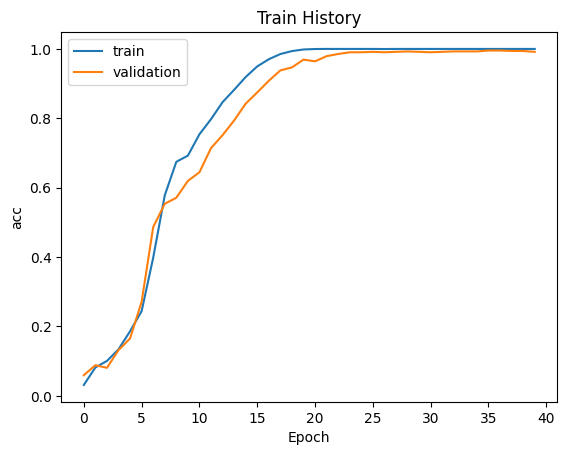

In [27]:
show_train_history(train_history,'acc','val_acc')

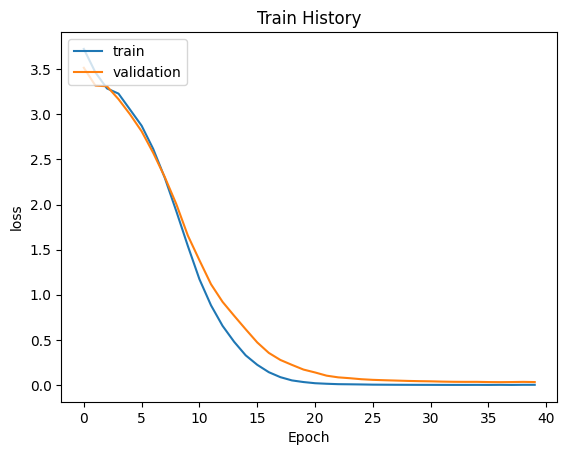

In [28]:
show_train_history(train_history,'loss','val_loss')

# 評估模型準確率

In [29]:
scores=model.evaluate(x_test_normalize,y_test_onehot,verbose=2)

4/4 - 0s - loss: 0.0369 - acc: 0.9926 - 322ms/epoch - 81ms/step


In [30]:
print('test_loss=',scores[0],'test_acc=',scores[1])

test_loss= 0.03686138242483139 test_acc= 0.9925742745399475


In [31]:
scores=model.evaluate(x_train_normalize,y_train_onehot,verbose=2)

32/32 - 3s - loss: 0.0076 - acc: 0.9980 - 3s/epoch - 105ms/step


In [32]:
print('test_loss=',scores[0],'test_acc=',scores[1])

test_loss= 0.007560912985354662 test_acc= 0.9980019927024841


# 進行預測

In [33]:
probability = model.predict(x_test_normalize)

4/4 [==============================] - 0s 85ms/step


In [34]:
prediction=tf.argmax(probability, axis=-1).numpy() 

In [35]:
# 將編碼轉換為原始類別標籤
prediction_decoded = []
for label in prediction:
    decoded_label = ''.join([decoding_dict[code] for code in label])
    prediction_decoded.append(decoded_label)
prediction_decoded

['7FY3',
 'TKP2',
 'R54R',
 'R3W4',
 '7GMZ',
 'GCCZ',
 'W77T',
 'DKZT',
 '5M76',
 'NZTZ',
 'KNTG',
 '5VRK',
 'PRDP',
 'Y63F',
 'GRV2',
 'GTW3',
 '3VV3',
 'HKR7',
 'CZDV',
 'GNKK',
 '96ND',
 '2MZV',
 'K7NM',
 'YWYP',
 '6DPT',
 'FFC4',
 'H3CP',
 '5HM9',
 'T9VH',
 'D6VF',
 'CF4M',
 '2PWH',
 '52HR',
 '7243',
 'VFH4',
 'CZ7D',
 '59PC',
 '4PT5',
 '9PG7',
 '3T42',
 '6ZHK',
 'TC2G',
 'TNZ9',
 'GKY5',
 'FTKG',
 'DCN3',
 '9PV3',
 '3VV3',
 'WTVR',
 'R7NK',
 '5W77',
 '9WMR',
 'P92W',
 'N6TG',
 'HZVZ',
 '3NYG',
 'NGMY',
 'H9NC',
 'GZY6',
 'CYC6',
 'HDT5',
 '9GK3',
 'R6VZ',
 'ZF3P',
 'KNTG',
 'YVK5',
 'PTC7',
 '9HNG',
 'YPCM',
 'M2K6',
 'CF4M',
 '46F5',
 'W4HV',
 '65C5',
 '2DPC',
 '6949',
 '6NH2',
 'P76N',
 'N7Z4',
 'CYGP',
 'ZNR2',
 'N3CV',
 'WMDN',
 'Z2Y2',
 '4TMW',
 'MWTM',
 'TCD6',
 'NR9G',
 'FV7G',
 '6CMG',
 '2553',
 '4T76',
 '63N5',
 'NR9G',
 'ZHC9',
 'W9NF',
 'CWCG',
 'WMDC',
 'HDT5',
 'RTWZ',
 'YVRH']

In [36]:
y_test_label

array(['7FY3', 'TKP2', 'R54R', 'R3W4', '7GMZ', 'GCCZ', 'W77T', 'DKZT',
       '5M76', 'NZTZ', 'KNTG', '5VRK', 'PRDP', 'Y63F', 'GRV2', 'GTW3',
       '3VV3', 'HKR7', 'CZDV', 'GNKK', '96ND', '2MZV', 'K7NM', 'YWYP',
       '6DPT', 'FFC4', 'H3CP', '5HM9', 'T9VH', 'D6VF', 'CF4M', '2PWH',
       '52HR', '7243', 'VFH4', 'CZ7D', '59PC', '4PT5', '9PG7', '3T42',
       '6ZHK', 'TC2G', 'TNZ9', 'GKY5', 'FTKG', 'DCN3', '9PV3', '3VV3',
       'WTVR', 'R7NK', '5W77', '9WMR', 'P92W', 'N6TG', 'HZVZ', '3NYG',
       'NGMY', 'H9NC', 'GZY6', 'CYC6', 'HDT5', '9GK3', 'R6VZ', 'ZF3P',
       'KNTG', 'YVK5', 'PTC7', '9H5G', 'YPCM', 'M2K6', 'CF4M', '4MF5',
       'W4HV', '65C5', '2DPC', '6949', '6NH2', 'P76N', 'N7Z4', 'CYGP',
       'ZNR2', 'N3CV', 'WMDN', 'Z2Y2', '4TMW', 'MWTM', 'TCD6', 'NR9G',
       'FV7G', '6CMG', '2553', '4T76', '63N5', 'NR9G', 'ZHC9', 'W9NF',
       'CWCG', 'WMDC', 'HDTM', 'RTWZ', 'YVRH'], dtype='<U4')

# 答案預測比較

predict	 label
9HNG	 9H5G


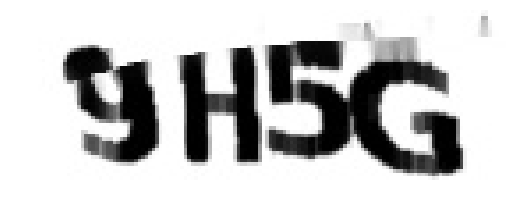

predict	 label
46F5	 4MF5


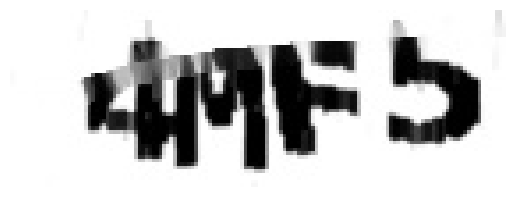

predict	 label
HDT5	 HDTM


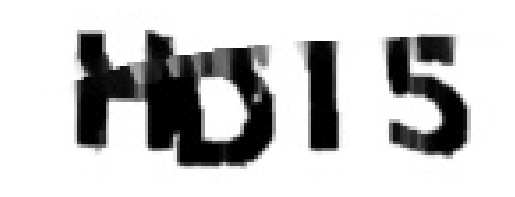

In [37]:
from PIL import Image
import numpy as np

for s in range(len(prediction_decoded)):
    if (prediction_decoded[s] != y_test_label[s]):
        # print(prediction_decoded[s] + ":" + y_test_label[s])
        print("predict\t label")
        print(prediction_decoded[s] + "\t " + y_test_label[s])
        array = (x_test_image[s])
        # 转换为图像对象
        image = Image.fromarray(array.astype(np.uint8))
        # 显示图像
        plt.imshow(array, cmap='gray')
        plt.axis('off')
        plt.show()

# classification_report

In [38]:
import warnings
from sklearn.metrics import classification_report

warnings.filterwarnings("ignore")

# 假设您的模型预测结果为prediction_decoded，真实标签为y_train_label
# 计算分类报告
report = classification_report(y_test_label, prediction_decoded, output_dict=True)

accuracy = report['accuracy']
macro_avg_precision = report['macro avg']['precision']
macro_avg_recall = report['macro avg']['recall']
macro_avg_f1_score = report['macro avg']['f1-score']
weighted_avg_precision = report['weighted avg']['precision']
weighted_avg_recall = report['weighted avg']['recall']
weighted_avg_f1_score = report['weighted avg']['f1-score']

print("Accuracy:", "{:.3f}".format(accuracy))
print("Macro Avg Precision:", "{:.3f}".format(macro_avg_precision))
print("Macro Avg Recall:", "{:.3f}".format(macro_avg_recall))
print("Macro Avg F1-Score:", "{:.3f}".format(macro_avg_f1_score))
print("Weighted Avg Precision:", "{:.3f}".format(weighted_avg_precision))
print("Weighted Avg Recall:", "{:.3f}".format(weighted_avg_recall))
print("Weighted Avg F1-Score:", "{:.3f}".format(weighted_avg_f1_score))
report = classification_report(y_test_label, prediction_decoded)
# 打印综合表格
print(report)

Accuracy: 0.970
Macro Avg Precision: 0.944
Macro Avg Recall: 0.949
Macro Avg F1-Score: 0.946
Weighted Avg Precision: 0.965
Weighted Avg Recall: 0.970
Weighted Avg F1-Score: 0.967
              precision    recall  f1-score   support

        2553       1.00      1.00      1.00         1
        2DPC       1.00      1.00      1.00         1
        2MZV       1.00      1.00      1.00         1
        2PWH       1.00      1.00      1.00         1
        3NYG       1.00      1.00      1.00         1
        3T42       1.00      1.00      1.00         1
        3VV3       1.00      1.00      1.00         2
        46F5       0.00      0.00      0.00         0
        4MF5       0.00      0.00      0.00         1
        4PT5       1.00      1.00      1.00         1
        4T76       1.00      1.00      1.00         1
        4TMW       1.00      1.00      1.00         1
        52HR       1.00      1.00      1.00         1
        59PC       1.00      1.00      1.00         1
        5H

In [39]:
prediction_decoded[0]

'7FY3'

In [40]:
y_test_label[0]

'7FY3'